### Introudcing the Problem

#### Predicting Car Prices
- Question I want answered:
  1. Which factors are most signifcant in determining the price of a car?
  2. What kind of model can effectivly predict the price of a car based on features like brand, model, mileage, year, etc. ?



#### How we approach the problem
- Predicting the price of cars based on a wide range of attributes and features. Using a dataset containing car details such selling price, km driven, engine specifications, and more, we aim to develop a machine learning model that accurately estimates the price of different car models.

#### About the Dataset 
- This dataset contains information about used cars in India. 
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.


### What is Regression?
- Regression is a method of finding a relationship between 2 or more features in a dataset. For this project we will be looking at linear regression to predict car prices based on different factors and then testing how accurate the model actually is.

- For this project we the following libraries:

   - Pandas (dataframes)
   -   Matplotlib (Visualizations)
    - Seaborn (Visualizations)
    - Scikit-learn (Data partition, Regression, accuracy)
    - Statsmodel (Regression)

In [391]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
import statsmodels.api as sm
import os
import warnings

In [393]:
df = pd.read_csv('CA.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


### Introduction to Data
#### this dataset includes:
##### link to dataset: https://www.kaggle.com/code/mohaiminul101/car-price-prediction/input
- name: Name of the car
- year: Year of the car when it was bought
- selling_price: Price in Indian Rupees(INR)at which the car is being sold
- km_driven: Number of Kilometres the car is driven
- fuel: Fuel type of car (petrol / diesel / CNG / LPG / electric)
- selling_type: Tells if a Seller is Individual or a Dealer
- transmission: Gear transmission of the car (Automatic/Manual)
- owner : Number of previous owners of the car.



###### in total there are 300 entries

In [396]:
df.shape

(4340, 8)

In [189]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [255]:
# Check for null values 
df.isna().sum


<bound method DataFrame.sum of        name   year  selling_price  km_driven   fuel  seller_type  \
0     False  False          False      False  False        False   
1     False  False          False      False  False        False   
2     False  False          False      False  False        False   
3     False  False          False      False  False        False   
4     False  False          False      False  False        False   
...     ...    ...            ...        ...    ...          ...   
4335  False  False          False      False  False        False   
4336  False  False          False      False  False        False   
4337  False  False          False      False  False        False   
4338  False  False          False      False  False        False   
4339  False  False          False      False  False        False   

      transmission  owner  
0            False  False  
1            False  False  
2            False  False  
3            False  False  
4           

In [257]:
#displays the data types

df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [195]:
# Find unique values in car brand names

set(df['name'].to_list())

{'Tata Sumo SE Plus BSIII',
 'Mercedes-Benz B Class B180 Sports',
 'BMW 3 Series 320d Sport Line',
 'Toyota Innova 2.5 E 8 STR',
 'Maruti Swift 1.3 LXI',
 'Hyundai Creta 1.6 SX',
 'Tata Sumo Victa CX 7/9 Str BSII',
 'Skoda Laura Ambiente 2.0 TDI CR MT',
 'Maruti Swift ZXI Plus',
 'Honda City i DTec V',
 'Datsun redi-GO AMT 1.0 T Option',
 'Toyota Innova 2.5 GX (Diesel) 8 Seater',
 'Hyundai i10 Asta AT',
 'Ford Figo Aspire 1.5 TDCi Ambiente ABS',
 'Ford Ecosport 1.0 Ecoboost Titanium Optional',
 'Tata Tiago 1.2 Revotron XE',
 'Ford EcoSport 1.5 Petrol Titanium Plus AT BSIV',
 'Ford Aspire Titanium Diesel BSIV',
 'Honda Amaze VX Diesel BSIV',
 'Audi A6 2.7 TDI',
 'Maruti Swift Dzire Vdi BSIV',
 'Kia Seltos HTK Plus AT D',
 'Toyota Corolla Altis Diesel D4DGL',
 'Maruti Zen Estilo VXI BSIV',
 'Volkswagen Vento Diesel Trendline',
 'Ford Fiesta Classic 1.6 Duratec CLXI',
 'Mahindra Scorpio SLE BS IV',
 'Mahindra Scorpio SLE BSIII',
 'Hyundai Verna 1.6 SX VTVT (O)',
 'Hyundai Santro Xing XK (

In [197]:
# Find unique values in fuel types

set(df['fuel'].to_list())

{'CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'}

In [199]:
# Find unique values in seller type 

set(df['seller_type'].to_list())

{'Dealer', 'Individual', 'Trustmark Dealer'}

In [201]:
# Find unique values in transmission type 

set(df['transmission'].to_list())

{'Automatic', 'Manual'}

### Preprocessing & Data Understanding

- The dataset has no nulls and the caregorical variables are already in order.
- Taking out any outliers is important so that it wont skew encoding and scaling if left in the dataset. 
- It is important for a regression model to not have too many unique categories so that it wont output inaccurate results.
- However, the dataset has categorical variables (fuel, seller_type, transmission, owner) that need to be converted into numerical format for regression.
- Since the dataset is showing used car prices in India, all prices are displayed in Indian Rupees, to ensure easier comparision and model interpretability we will convert these prices to USD. 


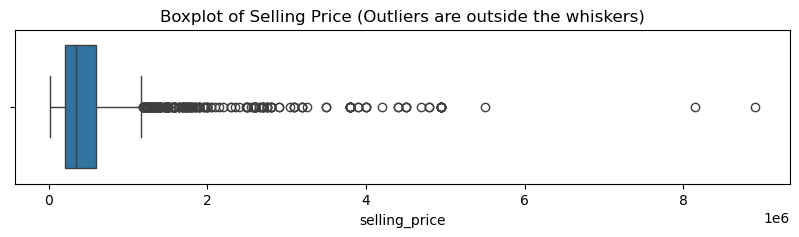

In [402]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['selling_price'])
plt.title("Boxplot of Selling Price (Outliers are outside the whiskers)")
plt.show()


In [404]:
num_outliers = outliers.shape[0]  
print(f"Total number of outliers in selling_price: {num_outliers}")

Total number of outliers in selling_price: 271


In [406]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['selling_price'].quantile(0.25)
Q3 = df['selling_price'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Interquartile Range): {IQR}")
print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")


Q1 (25th percentile): 208749.75
Q3 (75th percentile): 600000.0
IQR (Interquartile Range): 391250.25
Lower bound for outliers: -378125.625
Upper bound for outliers: 1186875.375


Original dataset size: 4340 rows
Cleaned dataset size: 4069 rows
Number of rows removed: 271


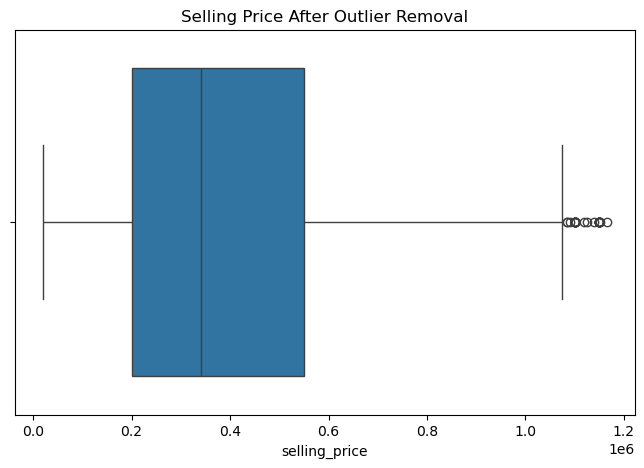

In [408]:
# Remove extreme outliers based on the bounds
df_cleaned = df[(df['selling_price'] >= lower_bound) & (df['selling_price'] <= upper_bound)]

# Print shape before and after removing outliers
print(f"Original dataset size: {df.shape[0]} rows")
print(f"Cleaned dataset size: {df_cleaned.shape[0]} rows")
print(f"Number of rows removed: {df.shape[0] - df_cleaned.shape[0]}")


plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned['selling_price'])
plt.title("Selling Price After Outlier Removal")
plt.show()


##### The data is much better distributed now!

In [415]:
# Check columns to see if the required columns are still present
print(df.columns)

# Drop 'name' column if it exists
if 'name' in df.columns:
    df = df.drop(columns=['name'])

# Ensure the columns for one-hot encoding exist
required_columns = ['fuel', 'seller_type', 'transmission', 'owner']
missing_columns = [col for col in required_columns if col not in df.columns]

if not missing_columns:
    # Perform one-hot encoding if all required columns exist
    df = pd.get_dummies(df, columns=required_columns, drop_first=True)
else:
    print(f"Missing columns: {missing_columns}")

# Convert boolean columns to integer (0/1)
df = df.astype(int)


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')


In [417]:
# Check if categorical variables were successfully converted into one-hot encoded columns
df.head()  
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   year                          4340 non-null   int64
 1   selling_price                 4340 non-null   int64
 2   km_driven                     4340 non-null   int64
 3   fuel_Diesel                   4340 non-null   int64
 4   fuel_Electric                 4340 non-null   int64
 5   fuel_LPG                      4340 non-null   int64
 6   fuel_Petrol                   4340 non-null   int64
 7   seller_type_Individual        4340 non-null   int64
 8   seller_type_Trustmark Dealer  4340 non-null   int64
 9   transmission_Manual           4340 non-null   int64
 10  owner_Fourth & Above Owner    4340 non-null   int64
 11  owner_Second Owner            4340 non-null   int64
 12  owner_Test Drive Car          4340 non-null   int64
 13  owner_Third Owner             434

#### now convert to USD

In [273]:
# Exchange rate (check latest value)
INR_TO_USD = 0.012  

# Save the original selling prices for comparison
original_selling_price = df['selling_price'].copy()


df['selling_price'] = df['selling_price'] * INR_TO_USD

# Print the change in selling prices
print("Original Selling Prices (INR):")
print(original_selling_price.head())  # Show the first 5 original values
print("\nConverted Selling Prices (USD):")
print(df['selling_price'].head())  # Show the first 5 converted values


Original Selling Prices (INR):
0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

Converted Selling Prices (USD):
0     720.0
1    1620.0
2    7200.0
3    3000.0
4    5400.0
Name: selling_price, dtype: float64


### Standardization 
- scaling numeric values so that they have a similar scale
- its important for linear regression models to help ensure that one feature doesnt dominate the other due to its scale
- standardization/scaling is used when working with machine learning algorithms to ensure that features with larger numerical ranges do not disproportioatley influence results

In [419]:
# Columns that need to be standardized (excluding the target variable)
numeric_cols = ['year', 'km_driven']  

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the features
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Print the scaled data
print(df[numeric_cols].head())


       year  km_driven
0 -1.445074   0.081139
1 -1.445074  -0.347689
2 -0.258795   0.724381
3  0.927485  -0.433455
4  0.215717   1.603479


### Expirement 1: Linear Regression Model

In [421]:
X = df.drop(columns=['selling_price'])  # Features
y = df['selling_price']  # Target (selling price)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions using the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f"Mean Squared Error (MSE): {mse}")
#root mean sqaured error
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 182146878750.2809
Mean Absolute Error (MAE): 221706.36930930056
R-squared (R2): 0.4031303601432119


/var/folders/j1/rydq6xn178q8p1rrxbwmhy4c0000gn/T/ipykernel_64335/1169978483.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')  # Ideal line


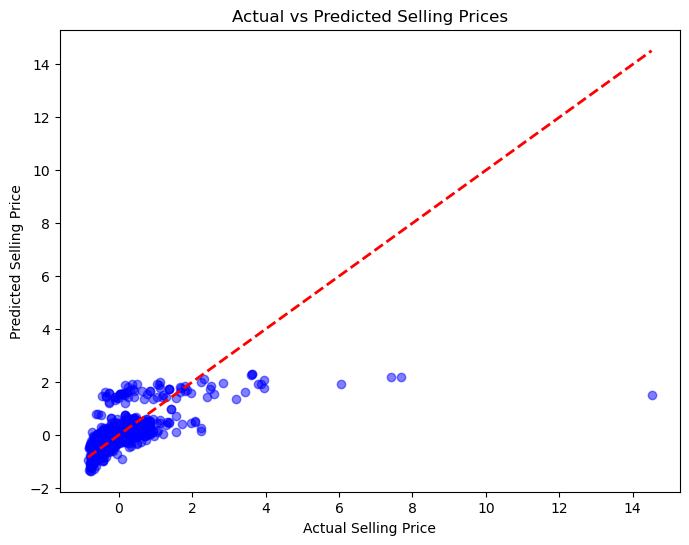

In [295]:
# 1. Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')  # Ideal line
plt.title('Actual vs Predicted Selling Prices')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.show()

#### Summary of Model
- Accuracy: The model is explaining about 40% of the variance in the selling price. However, there’s still some unexplained variability.
- Prediction Error: The model has a mean error of 38.3% of the selling price, which is quite large. The lower the MAE, the better the model.

#### Evaluation & Next steps:
- The model can definately be improved to lower the prediction and have more accurate results.
##### we will use RMSE ( root mean squared error) RMS E= square root of MSE 
- we already calculated MSE, which is: 0.5443044872012996
- RMSE is good because it penalizes large errors!
- RMSE represents the average difference between the predicted values and the actual values of the target variable


In [284]:
RMSE = np.sqrt(0.5443044872012996)  
print(f"Root Mean Squared Error (RMSE): {RMSE}")

Root Mean Squared Error (RMSE): 0.737769941920447


- these results mean that on average, the model is off by 0.74 USD for each prediction.
- This number is acceptable and suggests that the model is performing well, especially considering the scale of the selling price.

### Expirement 2: Polynomial Regression

In [300]:
from sklearn.linear_model import Ridge
X = df.drop(columns=['selling_price'])  # Features
y = df['selling_price']  # Target variable (selling price)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create Polynomial Features
poly = PolynomialFeatures(degree=2)  # You can change the degree for higher-order polynomials
X_train_poly = poly.fit_transform(X_train)  # Transform training data
X_test_poly = poly.transform(X_test)  # Transform test data

# Step 4: Train the Ridge Regression Model (You can also use LinearRegression())
model = Ridge(alpha=1.0)  # You can experiment with the alpha value for regularization strength
model.fit(X_train_poly, y_train)

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Step 6: Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 0.48422054436382295
R-squared (R²): 0.469016793501454


#### What do these results mean?
- The MSE in Experiment 2 is lower than in Experiment 1 (0.48 < 0.544).
- Indicating that the polynomial features have helped the model's predictions become closer to the actual values
- R² is higher in Experiment 2 (46.9% vs. 40.3%), which means the polynomial model is explaining a slightly greater portion of the variance in the selling price
#### Why polynomial regression?
- Polynomial Regression is more complex than Linear Regression because it can model non-linear relationships. However, this increased complexity doesn’t always result in a dramatic improvement, as seen here. The improvement in R² and MSE is noticeable but not large which suggests that the data does not require a very complex model to fit well.


#### Now lets visualize these reuslts:

/var/folders/j1/rydq6xn178q8p1rrxbwmhy4c0000gn/T/ipykernel_64335/1810833926.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')  # Identity line


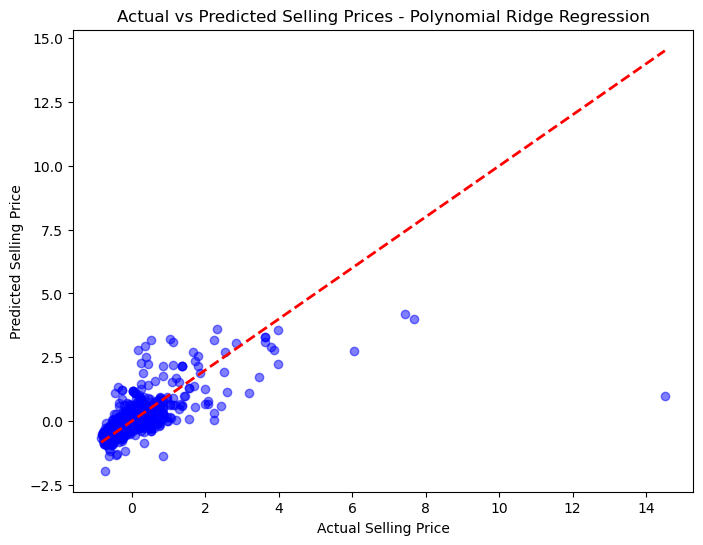

In [306]:
# Step 7: Visualize the Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')  # Identity line
plt.title('Actual vs Predicted Selling Prices - Polynomial Ridge Regression')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.show()

- Polynomial Regression outperforms Linear Regression slightly in this case, but the improvement is modest. The MSE is lower, and the R² is higher, but the difference is not drastic

#### We saw how the results change when we changed the model, now lets change some features to see the difference!
- Lets first see which factors impact the selling price the most to see what to take out.
- We can figure out what to change by looking a correlation heatmap.
#### How a heatmap works:
- color scale shows the strength of the correlation. A value close to 1 means a strong positive correlation, -1 means a strong negative correlation, and values close to 0 mean no correlation.


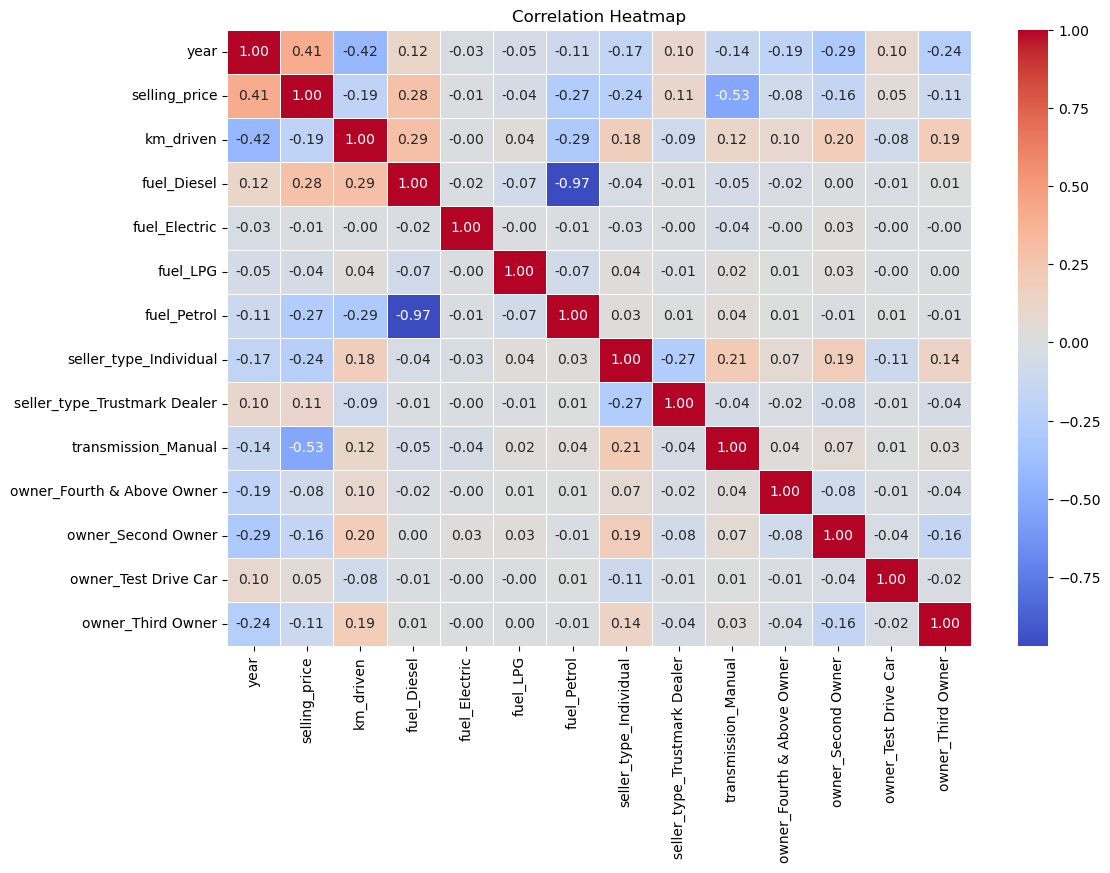

In [315]:
corr_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

#### Interpreting results from heatmap 
- We will look at features that correlate strongy with the selling_price, since we are trying to determine which factors have the most impact on used car prices.
- Looking at the 2nd row, the feature "year" has the strongest correlation compared to other factors.
 ##### The positive correlations from greatest to least are listed below:
 1. year
 2. fuel_Diesel
 3. seller_type_dealer
 4. owner_test_drive
##### The negative correlations from greatest to least are listed below:
1. transmission_Manual
2. fuel_petrol
3. seller_type_individual
4. km_driven


#### What to do next:
- for Experiment 3's regression model we will now take out the first 3 most negative correlated features to see the impact it has on the regression model 

### Experiment 3

In [337]:
X_filtered = X.drop(columns=['fuel_Petrol', 'seller_type_Individual', 'transmission_Manual'])

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")



Mean Squared Error (MSE): 0.7038145789489424
Mean Absolute Error (MAE): 0.42621122411358964
R-squared (R²): 0.2282158899273371


#### Interpreting the results
- MSE is 0.7038, is the squared difference between the predicted selling price and the actual selling price is around 0.7038.
- MAE is 0.4262, is the average absolute difference between predicted and actual selling prices is about 0.4262
- R² is 0.2282, indicates the model expalins 22.82% of the variance in the selling price.

#### Comparing Results from previous experiments
- The R² from Experiment 1 was 0.4031 which is much higher than 0.2282 from this experiment.
- This suggests that the features that were removed or kept in this experiment may not be as predictive of the selling price.
- The R² from Experiment 2 was 0.4690, which again is higher than the 0.2282 in this experiment. - - This shows that the polynomial regression model was better at capturing the relationship between the features and the target variable than the linear regression with the current feature selection.

#### Going forward:
- We will try and test to see if taking out these features with a different regression model will yeild better results. Lets start with polynomial regression again
- the goal is for the R² to be closer to 1!



### Polynomial Regression pt.2

In [347]:
# Drop selected features
X_filtered = df.drop(columns=['selling_price', 'fuel_Petrol', 'seller_type_Individual', 'transmission_Manual'])  
y = df['selling_price']  # Target variable

# Split the filtered data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

# Create Polynomial Features (degree = 2, you can experiment with higher degrees)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)  
X_test_poly = poly.transform(X_test)  

ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train_poly, y_train)

y_pred_poly = ridge_model.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Ridge Regression (Degree 2) Results:")
print(f"Mean Squared Error (MSE): {mse_poly}")
print(f"R-squared (R²): {r2_poly}")

Polynomial Ridge Regression (Degree 2) Results:
Mean Squared Error (MSE): 0.6812564726260665
R-squared (R²): 0.2529525017197852


#### What do these results mean?
- MSE (0.681) is lower than Experiment 3's linear regression MSE (0.703), meaning the polynomial regression slightly improved the error.
- (0.253) is better than the linear regression version (0.228), suggesting that introducing polynomial features helped capture some non-linear relationships

/var/folders/j1/rydq6xn178q8p1rrxbwmhy4c0000gn/T/ipykernel_64335/2226690810.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label="Perfect Fit")  # Identity line


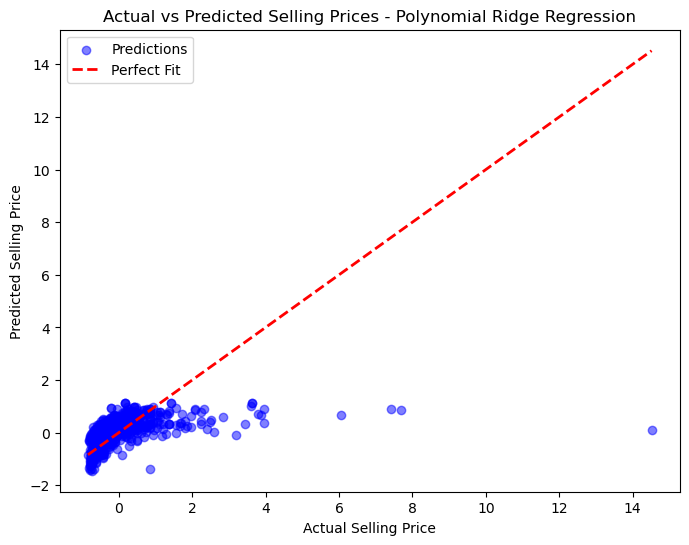

In [349]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label="Perfect Fit")  # Identity line
plt.title('Actual vs Predicted Selling Prices - Polynomial Ridge Regression')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.legend()
plt.show()

#### Trying a different model: Gradient Boosting Regression 

In [359]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 6.8 MB/s eta 0:00:00a 0:00:01


In [365]:
from sklearn.ensemble import GradientBoostingRegressor
# Step 1: Prepare the features and target
X = df.drop(columns=['selling_price'])  # Use all columns as features
y = df['selling_price']  # Target variable (selling price)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Gradient Boosting Regression model
model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_gb.fit(X_train, y_train)

# Step 4: Make predictions
y_pred_gb = model_gb.predict(X_test)

# Step 5: Evaluate the model's performance
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print results
print(f"Gradient Boosting Regression Results (with all features):")
print(f"Mean Squared Error (MSE): {mse_gb}")
print(f"R-squared (R²): {r2_gb}")


Gradient Boosting Regression Results (with all features):
Mean Squared Error (MSE): 0.47659782228373054
R-squared (R²): 0.4773756652169292


#### What do these results mean?
- The model has improved from previous models with lower R² values. The Gradient Boosting Regression seems to have captured the relationship between the features and the target (selling price) better than the earlier 
- lets visualize these results:

/var/folders/j1/rydq6xn178q8p1rrxbwmhy4c0000gn/T/ipykernel_64335/4248517367.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')  # Identity line


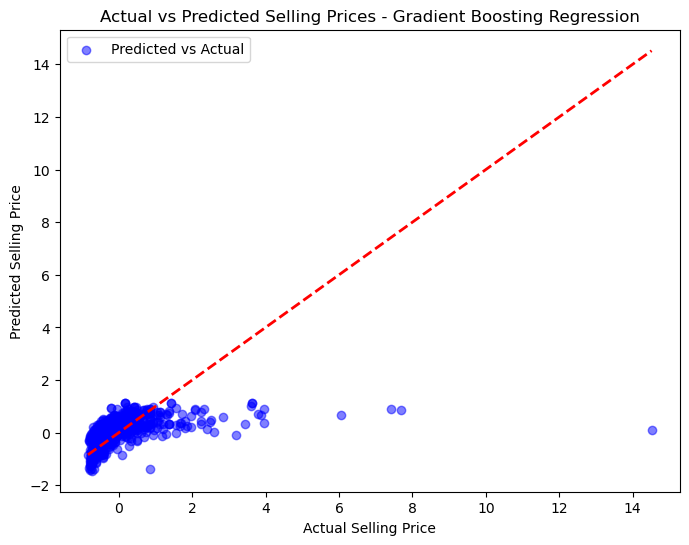

In [369]:
# Step 7: Visualize the Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')  # Identity line
plt.title('Actual vs Predicted Selling Prices - Gradient Boosting Regression')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.legend()
plt.show()

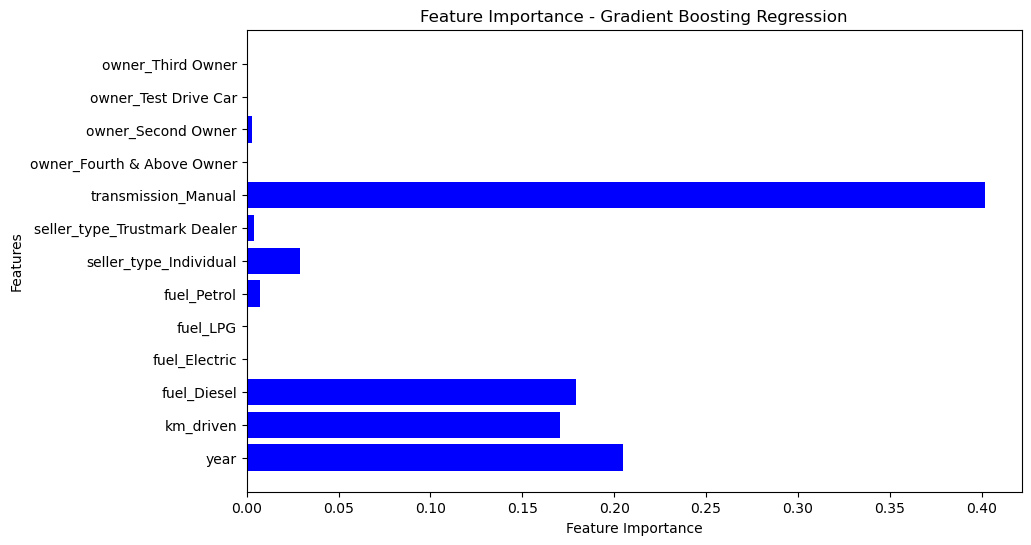

In [377]:
feature_importances = model_gb.feature_importances_

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importances, color='blue')
plt.title('Feature Importance - Gradient Boosting Regression')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()


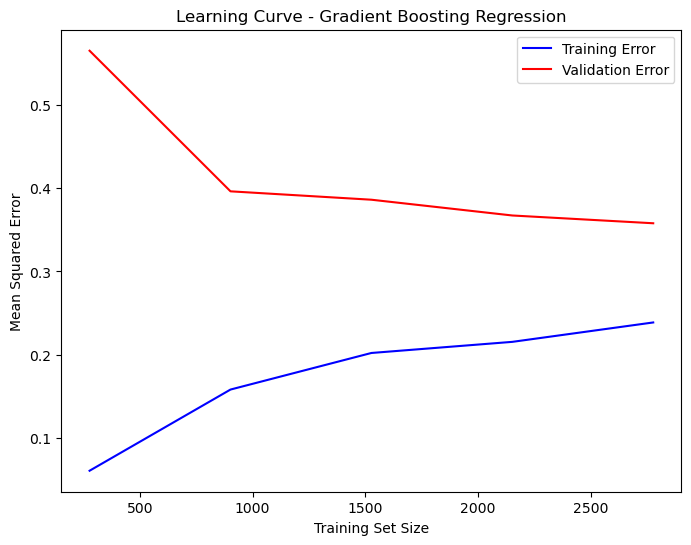

In [375]:
from sklearn.model_selection import learning_curve

# Step 1: Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(model_gb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Step 2: Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, -train_scores.mean(axis=1), label='Training Error', color='blue')
plt.plot(train_sizes, -test_scores.mean(axis=1), label='Validation Error', color='red')
plt.title('Learning Curve - Gradient Boosting Regression')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


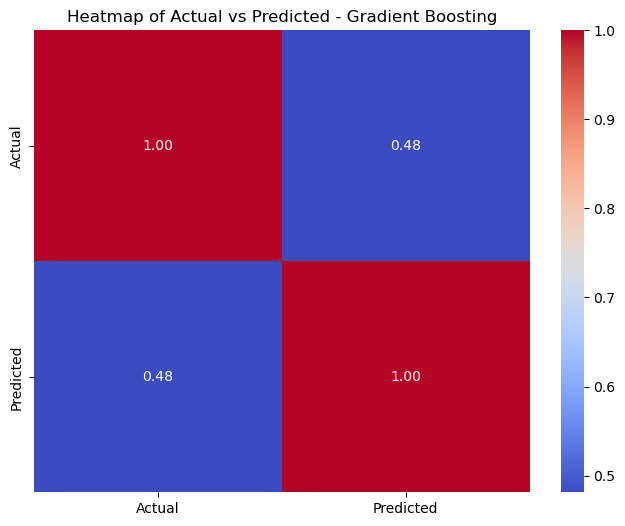

In [379]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Step 2: Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(comparison_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Actual vs Predicted - Gradient Boosting')
plt.show()

#### What this means: 
- The correlation value is 0.48, it means that there is a positive relationship between the actual and predicted values, but they are not perfectly aligned. A correlation of 0.48 indicates that there is a moderate positive correlation. The predictions are generally in the right direction, but not perfectly accurate.

### Impact Section
##### Impact of Predicting Car Prices Using Regression Models
This project aims to predict used car prices using regression models has several potential social, economic, and ethical implications.
While the goal is to create a reliable and accurate pricing model, there are both positive and negative impacts to consider

##### Social Impact: 
- More transparency: By providing a more accurate estimate of car prices, this model can help buyers and sellers make more informed decisions through reducing the chances of overpricing or underpricing vehicles.
##### Economic Impact:
- Improved Decision-Making : Car dealerships and online marketplaces could use this model to set competitive prices, optimize inventory management, and improve sales strategies.
##### Ethical Impact: 
- Data Bias and Fairness: If the dataset used to train the model is not diverse or representative, the model may produce biased price predictions
- Future improvements could involve refining the model with more diverse data, addressing potential biases, and ensuring ethical data usage to maximize benefits while minimizing negative consequences

### Conclusion
- When I started this project, I knew I wanted to work on something different from the commonly used house price dataset. I found interest in used car prices because they are relevant, and the data could be useful for future reference. However, I encountered several challenges throughout the process, which led me to restart multiple times.

- The first mistake I made was not fully analyzing the dataset before proceeding. The dataset I chose contained used car features from India, which might be highly relevant for someone living there, but for someone in the U.S., the car models, prices, and other features were not as applicable. Despite this, I decided to stick with the dataset and move forward with regression modeling.

- My initial linear regression model performed poorly, with an R-squared (R²) score of 0.403. I then experimented with polynomial regression, which slightly improved the score to R² = 0.469, but it was still far from an ideal value close to 1. To improve performance, I decided to drop features that had a negative correlation with the target variable, selling_price, based on a correlation heatmap. Unfortunately, instead of improving the model, this made the results even worse, dropping the R² score to 0.228.

- At this point, I felt frustrated and considered switching to a new dataset, even though I had already invested countless hours into this project. I experimented with multiple regression models, yet none significantly improved the R² score. Eventually, I tried Gradient Boosting Regressor, which slightly increased the R² score to 0.477. However, I kept wondering if the issue was simply that I hadn’t found the right regression model.

- After discussing my challenges with the TA, I realized that sometimes outdated data can negatively affect the results. The dataset I was using was quite old, and the presence of outliers, especially luxury cars, was skewing the model's performance. This experience has taught me the importance of thoroughly analyzing datasets before using them in projects, properly preprocessing and scaling data, and understanding the limitations of machine learning models when working with real-world datasets.

- While my final model did not achieve a high R² score, the knowledge I gained about data quality, feature selection, and model selection has been invaluable. Moving forward, I will ensure that I carefully evaluate datasets before choosing them for regression projects and take extra steps in data preprocessing to improve model performance.

### References
- https://www.kaggle.com/code/mohaiminul101/car-price-prediction/input
- https://pub.aimind.so/understanding-linear-and-polynomial-regression-a-comprehensive-guide-b01c48e22ad6
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.htmlLinks 
- https://developer.nvidia.com/blog/gradient-boosting-decision-trees-xgboost-cuda/
- https://absentdata.com/python-graphs/create-a-heat-map-with-seaborn/